# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Importing the dataset

In [ ]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.tail()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


# Implementing UCB algorithm

In [ ]:
N = 500
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

In [ ]:
for n in range(0, N):
  ad = 0
  max_upper_bound= 0
  for i in range(0, d):
    if (number_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt((3 / 2 * math.log(n + 1)) / number_of_selections[i])
      upper_bound =  average_reward + delta_i
    else: 
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  reward = df.values[n, ad]
  sums_of_rewards[ad] += reward
  total_reward += reward

# Visualising the results

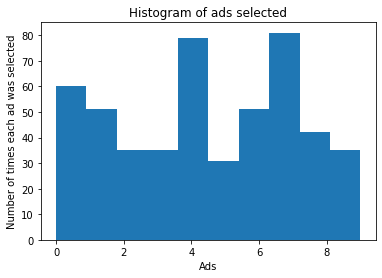

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()